# PREDICTING CAR PRICES USING DECISION TREES

Like many other industies, the automobile industry has been immensely impacted by the developments in science and technology. Each year, car manufacturing companies often release a new car model which are improvements ove the previous model. [Statista](https://www.statista.com/statistics/200002/international-car-sales-since-1990/#:~:text=Worldwide%20car%20sales%20grew%20to,63.8%20million%20units%20in%202020.) records that the number of cars sold globally in the year 2021 was more than 66million units. While to some, buying a car is a luxury, to others, it is just another necessity. While the units of cars sold annually appears to be a lot, it must also be said that the automobile industry is a very competitive industry. Hence, each manufacturer has to mindful of the price of their car if they hope to remain competitive. There are several factors that would be considered important in the determination of the price of a car. Some of these factors includes the features of the car - features like type of engine, size of the car, interior fittings, etc. Another major contributor is the respect commanded by the car manufacturer. 

In this project, we would be using the [decision tree](https://www.lucidchart.com/pages/decision-tree) to build a [machine learning](https://www.ibm.com/cloud/learn/machine-learning) model that could be used to predict the price of a car. 
The [dataset](https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv) used in this project was downloaded from Kaggle, and it consists of 205 observations, having 25 features and one target varibale which is "price". We would be investigating our data to make sure it is clear and organised for usage in the model building in order to create an effective model. Following that, the dataset is divided into two groups, one of which is used to train the model and the other to test it. Based on how well our model performed in forecasting the pricing of the cars in our test sample, we would assess the model's level of accuracy in this procedure.

# Set Up

Here, all the libraries needed for this project are imported. Adding them here also helps organize the codes and makes it easier for anyone to look through the libraries used.

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Getting the Data

This dataset contains features of different car models and a target variable which is "price". The goal is to inspect how these features influence the price of a car and with that information, manufacturers can make more informed decision in the design of cars based on preferences of the customers.

Hence, the dataset is loaded and converted into dataframes:

In [2]:
# Import the data and view the first few observations
Cars_data = pd.read_csv("CarPrice.csv")
Cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Exploratory Data Analysis (EDA)

This is the very critical point where we take a deep dive into the dataset to have a better understanding of it's features and attributes. This stage sets the right foundation for beuilding an effective model in machine learning. Hence, we would be looking at the characteristics of the feautures, we would look out for missing values and identify feautures that might some kind of modification:

In [3]:
# We inspect the number of rows and columns present in  our dataset

Cars_data.shape

(205, 26)

In [4]:
# We check for missing values in each of the features

Cars_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
# This displays some attribues of the columns

Cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
# This describes the distribution of each of the features in the dataset

Cars_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
len(Cars_data.CarName.unique())

147

In [8]:
# symboling: -2 (least risky) to +3 most risky
# Most cars are 0,1,2

Cars_data['symboling'].astype('category').value_counts()

0     67
1     54
2     32
3     27
-1    22
-2     3
Name: symboling, dtype: int64

In [9]:
# There are two types of "fuel type" considered in this dataset, we would like to see the distribution of the these feature.

Cars_data['fueltype'].astype('category').value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [10]:
# Drive Wheel indicates the kind of drive wheel installed in the car. 
# There are three types in this dataset and their distribution is listed below

Cars_data['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [11]:
# Engine type is also an important consideration in cars. the distribution of this feature in the 
# dataset is listed below as follows

Cars_data['enginetype'].astype('category').value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

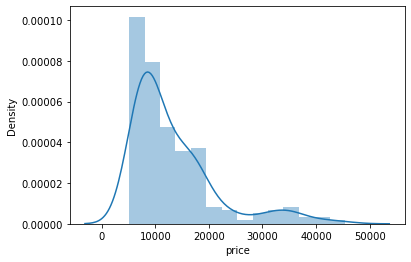

<Figure size 864x504 with 0 Axes>

In [12]:
# Here we examine the target variable

sns.distplot(Cars_data['price'])
plt.figure(figsize=(12, 7))
plt.show()


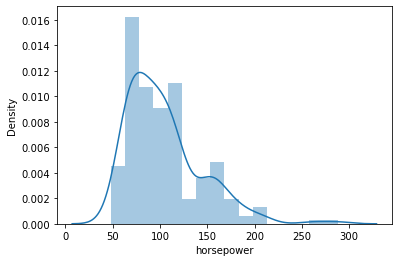

<Figure size 864x504 with 0 Axes>

In [13]:
sns.distplot(Cars_data['horsepower'])
plt.figure(figsize=(12, 7))
plt.show()

In [14]:
# Get unique values in the 'cylindernumber' column

print('The Number of Cylinder valus are:',sorted(Cars_data["cylindernumber"].unique()))

The Number of Cylinder valus are: ['eight', 'five', 'four', 'six', 'three', 'twelve', 'two']


The result above shows that values in "cylindernumber" is a string in our dataset. For ease of exploration, we can convert these values to numbers(either integers or float). Also, note that the number of cylinders started from "two", whcih is understable and aligns with what is expected of a car, it is almost impossible for a car with a combustion engine to have o or 1 cylinder.

In [15]:
Cars_data["cylindernumber"] = Cars_data["cylindernumber"].map({"two": 2, "three": 3, 
                                 "four": 4, "five": 5, "six": 6, "seven": 7,
                                 "eight": 8})

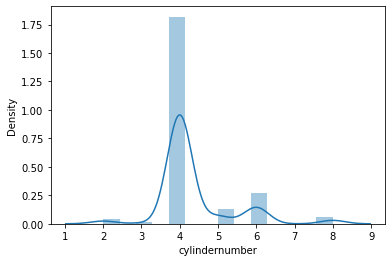

<Figure size 864x504 with 0 Axes>

In [16]:
# cylindernumber: number of cylinders in the combustion engine
sns.distplot(Cars_data['cylindernumber'])
plt.figure(figsize=(12, 7))
plt.show()

From the result above, we can see that most cars have 4 cylinders.

# Feature Engineering

[Feature engineering](https://towardsdatascience.com/what-it-takes-to-be-correlated-ce41ad0d8d7f#:~:text=Correlation%20(to%20be%20exact%20Correlation,Categorical%2C%20Continous%20and%20Categorical).) refers to the process of selecting and redesigning the features in a dataset before a machine learning model is designed. This process is very important in building a suitable model. In this project, feature engineering would be carried out on "CarName" as follows:

In [17]:
# Let's consider the unique car names listed in this dataset

Cars_data.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

Looking at the result above, we can see that the cars are listed by Car models, and not car manufacturers. This means that different car models froma single car maker are listed separately. However, we would like to see the car makers listed independently. Hence, we inspect the few car names listed so we understand the naming pattern - 

In [18]:
# CarName: first few entries
Cars_data['CarName'][:10]

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
5                    audi fox
6                  audi 100ls
7                   audi 5000
8                   audi 4000
9         audi 5000s (diesel)
Name: CarName, dtype: object

In [19]:
# Extracting carname and add as a new column CarBrands

# Method 1: str.split() by space
CarBrands = Cars_data['CarName'].apply(lambda x: x.split(" ")[0])
CarBrands[:10]
Cars_data["CarBrands"] = CarBrands

# look at all number of cars per Car maker 
Cars_data['CarBrands'].astype('category').value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
porcshce        1
toyouta         1
vokswagen       1
mercury         1
Nissan          1
Name: CarBrands, dtype: int64

Looking at the result above, while we have the names of the car companies listed as "CarBrands" just as we wanted, it has been observed that some of these are duplicated due to errors in the names. These errors if not attended to could negatively impact some of the results of our analysis. Therefore, we need to make the necessary corections to these names - 

In [20]:
# replacing misspelled car_company names

# volkswagen
Cars_data.loc[(Cars_data['CarBrands'] == "vw") | 
         (Cars_data['CarBrands'] == "vokswagen")
         , 'CarBrands'] = 'volkswagen'

# Toyota
Cars_data.loc[Cars_data['CarBrands'] == "toyouta", 'CarBrands'] = 'toyota'

# mazda
Cars_data.loc[Cars_data['CarBrands'] == "maxda", 'CarBrands'] = 'mazda'

# porsche
Cars_data.loc[Cars_data['CarBrands'] == "porcshce", 'CarBrands'] = 'porsche'

# nissan
Cars_data.loc[Cars_data['CarBrands'] == "Nissan", 'CarBrands'] = 'nissan'

In [21]:
# Now we can inspect if the adjustments made above were effective

Cars_data['CarBrands'].astype('category').value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarBrands, dtype: int64

Now that we have a list of the car manufacturers just as we wanted, we can now drop the column "CarName".

In [22]:
# drop carname column
Cars_data = Cars_data.drop('CarName', axis=1)
Cars_data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrands
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


Now, we want to consider the correlation between the features in the dataset. [Correlation](https://towardsdatascience.com/what-it-takes-to-be-correlated-ce41ad0d8d7f#:~:text=Correlation%20(to%20be%20exact%20Correlation,Categorical%2C%20Continous%20and%20Categorical).) is a measure of the linear relationship present between variables.

In [23]:
print(Cars_data.corr())

                    car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
cylindernumber   -0.073178  -0.103528   0.369419   0.440640  0.546222   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   

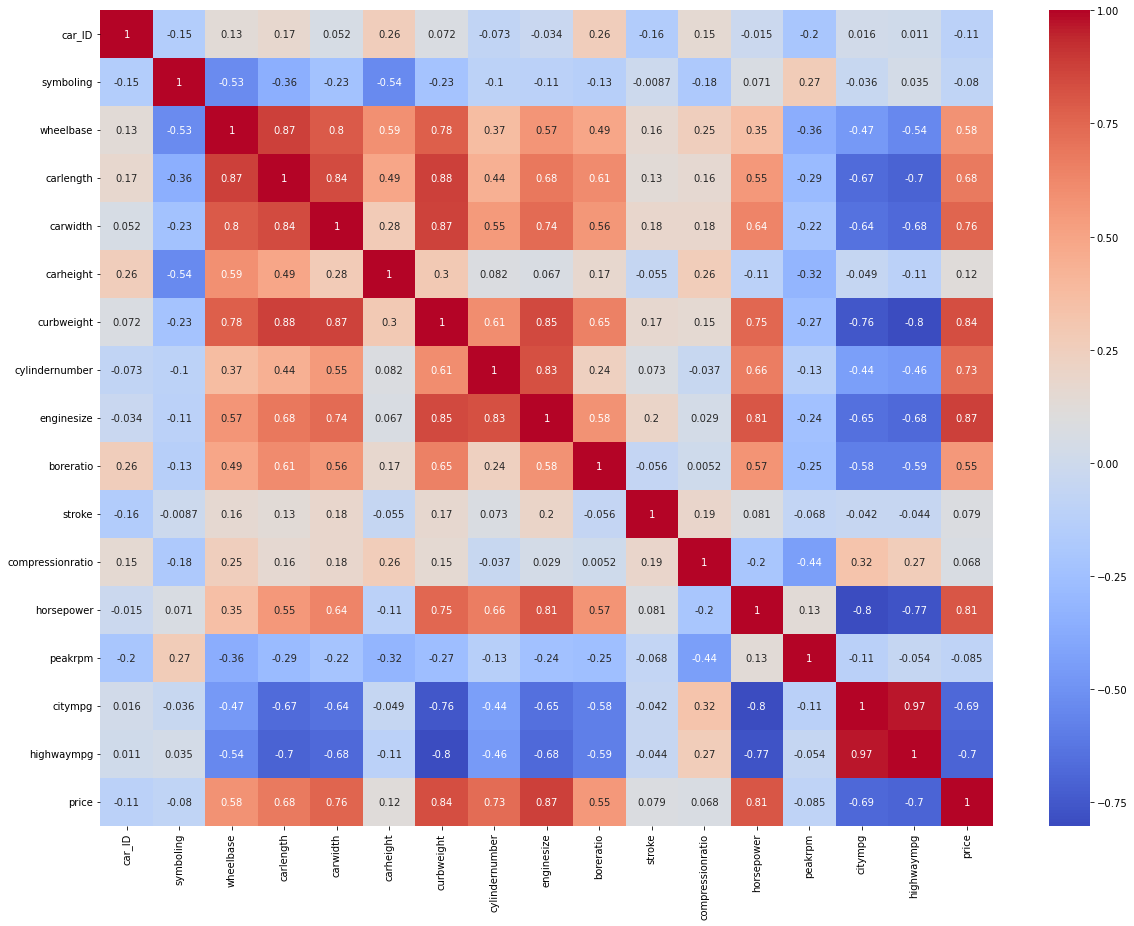

In [24]:
plt.figure(figsize=(20, 15))
correlations = Cars_data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

From the output of the [heatmap](https://stats.stackexchange.com/questions/392517/how-can-one-interpret-a-heat-map-plot) above, we can measure the level of linear correlation between the different features in our dataset. The value of the correlation is usually between +1 and -1. The value of 1 can be seen across the diagonal because it represents the point at which a particular feature was measured against itself. Values closer to "+1" indicates a strong positive correlation(linear relationship) between the two features, i.e as one increases, the other also increases. However, when the values tend towards -1, this indicates a negative linear relationship between two features involve, meaning, as one increases, the other decreases. When the value is closer to zero, it means that there is no linear relationship between the two variables involved. 

# Building the model using Decision Trees

In order to build an effective model model, out dataset needs to be properly classified. In this project, the target variable is the "price" of the car, while all other feautures are used to predict that target variable. Before the machine learning mode is built, the dataset needs to be divided into two portions, a training set and a test set. The training set is used to train the algorithm, while the test set is used to validate the level of correctness of the designed model.

In [25]:
# Define the traget variable and the predictor variables

predict = "price"
Car_features = Cars_data[["symboling", "wheelbase", "carlength", 
             "carwidth", "carheight", "curbweight", 
             "enginesize", "boreratio", "stroke", 
             "compressionratio", "horsepower", "peakrpm", 
             "citympg", "highwaympg", "price"]]

In [26]:
# Splitting the dataset into training and test sets for both the target and predictor variables.

x = np.array(Car_features.drop([predict], 1))
y = np.array(Cars_data[predict])

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

print("The size of training input is", xtrain.shape)
print("The size of training output is", ytrain.shape)
print("The size of testing input is", xtest.shape)
print("The size of testing output is", ytest.shape)

The size of training input is (164, 14)
The size of training output is (164,)
The size of testing input is (41, 14)
The size of testing output is (41,)


In [27]:
# Train the machine learning model and score the model after model prediction

model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

model.score(xtest, predictions)

1.0

From the result aboves, we can see that our model scored a 100% when it was used to predict the dataset that was reserved for testing. This shows that the model is effective in the prediction of the prices of cars when the features of the cars are provided. 

In [28]:
# finding the training and testing accuracy

print("Training Accuracy: ",model.score(xtrain, ytrain) * 100)
print("Testing Accuracy: ", model.score(xtest, ytest) * 100)

Training Accuracy:  99.83023910011116
Testing Accuracy:  90.10789605200371


The output above indicates a variation in the training and testing accuracy.

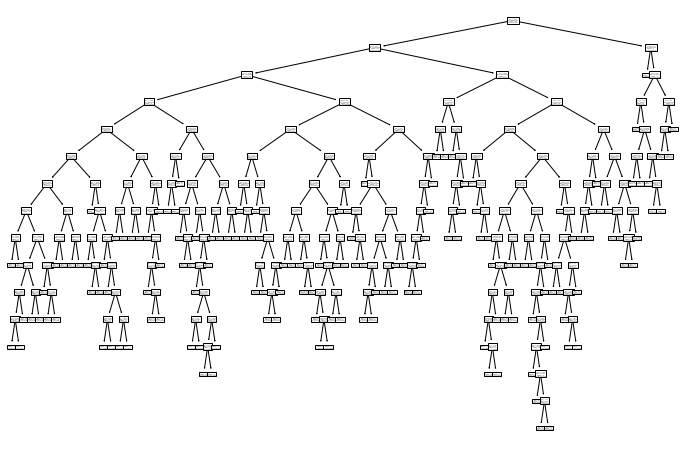

In [29]:
plt.figure(figsize=(12,8))

tree.plot_tree(model.fit(xtrain, ytrain));

# Conclusion

From the analysis above, we can see that the model scored above 90percent in the training and testing accuracy. While this is a good score, the percentage accuracy of this model might possibly be improved upon by the implementation of some feature selection for the entire dataset before it is splitted into training and test data. 

---
<div style="text-align: right ;font-size: small; color: gray"> 
Notebook by Oludare Fasure, for CF969 - Big Data for Computational Finance, Msc Data Science and it's Applications, University of Essex. <hspace="10" align="right"></a></div>